**1. Importing the dependencies**

# New Section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

**2. Data Loading and Understanding**

In [2]:
# load teh csv data to a pandas dataframe
# df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv("/content/Final_dataset.csv")


In [3]:
df.shape

(25000, 20)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No
1,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
2,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
3,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
4,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes


In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No
1,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            25000 non-null  object 
 1   SeniorCitizen     25000 non-null  int64  
 2   Partner           25000 non-null  object 
 3   Dependents        25000 non-null  object 
 4   tenure            25000 non-null  int64  
 5   PhoneService      25000 non-null  object 
 6   MultipleLines     25000 non-null  object 
 7   InternetService   25000 non-null  object 
 8   OnlineSecurity    25000 non-null  object 
 9   OnlineBackup      25000 non-null  object 
 10  DeviceProtection  25000 non-null  object 
 11  TechSupport       25000 non-null  object 
 12  StreamingTV       25000 non-null  object 
 13  StreamingMovies   25000 non-null  object 
 14  Contract          25000 non-null  object 
 15  PaperlessBilling  25000 non-null  object 
 16  PaymentMethod     25000 non-null  object

In [8]:
# dropping customerID column as this is not required for modelling
# df = df.drop(columns=["customerID"])

In [9]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No
1,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
print(df["gender"].unique())

['Male' 'Female']


In [12]:
print(df["SeniorCitizen"].unique())

[0 1]


In [13]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Male' 'Female']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['No' 'Yes']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['Yes' 'No']
--------------------------------------------------
MultipleLines ['No' 'Yes' 'No phone service']
--------------------------------------------------
InternetService ['No' 'Fiber optic' 'DSL']
--------------------------------------------------
OnlineSecurity ['No internet service' 'No' 'Yes']
--------------------------------------------------
OnlineBackup ['No internet service' 'No' 'Yes']
--------------------------------------------------
DeviceProtection ['No internet service' 'Yes' 'No']
--------------------------------------------------
TechSupport ['No internet service' 'No' 'Yes']
--------------------------------------------------
StreamingTV ['No internet service' 'Y

In [14]:
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        43
Churn                0
dtype: int64


In [15]:
#df["TotalCharges"] = df["TotalCharges"].astype(float)

In [16]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
len(df[df["TotalCharges"]==" "])

0

In [18]:
from math import nan
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})
df["TotalCharges"] = df["TotalCharges"].fillna("0.0")

In [19]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            25000 non-null  object 
 1   SeniorCitizen     25000 non-null  int64  
 2   Partner           25000 non-null  object 
 3   Dependents        25000 non-null  object 
 4   tenure            25000 non-null  int64  
 5   PhoneService      25000 non-null  object 
 6   MultipleLines     25000 non-null  object 
 7   InternetService   25000 non-null  object 
 8   OnlineSecurity    25000 non-null  object 
 9   OnlineBackup      25000 non-null  object 
 10  DeviceProtection  25000 non-null  object 
 11  TechSupport       25000 non-null  object 
 12  StreamingTV       25000 non-null  object 
 13  StreamingMovies   25000 non-null  object 
 14  Contract          25000 non-null  object 
 15  PaperlessBilling  25000 non-null  object 
 16  PaymentMethod     25000 non-null  object

In [21]:
# checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     18460
Yes     6540
Name: count, dtype: int64


**Insights:**
1. Customer ID removed as it is not required for modelling
2. No mmissing values in the dataset
3. Missing values in the TotalCharges column were replaced with 0
4. Class imbalance identified in the target

**3. Exploratory Data Analysis (EDA)**

In [22]:
df.shape

(25000, 20)

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No
1,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,25000.000000,25000.00000,25000.000000,25000.000000
mean,0.161200,32.31704,64.573860,2270.453308
std,0.367723,24.52011,30.199031,2261.247649
min,0.000000,0.00000,18.250000,0.000000
25%,0.000000,9.00000,34.800000,398.550000
50%,0.000000,29.00000,70.300000,1388.000000
75%,0.000000,55.00000,89.800000,3772.500000
max,1.000000,72.00000,118.750000,8684.800000


**Numerical Features - Analysis**

Understand the distribution of teh numerical features

In [26]:
def plot_histogram(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

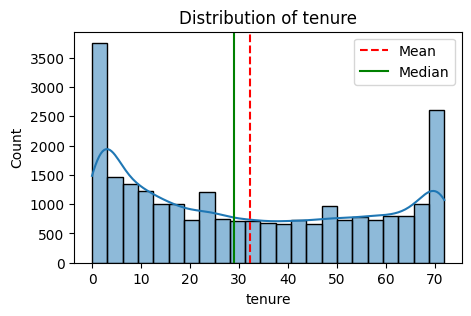

In [27]:
plot_histogram(df, "tenure")

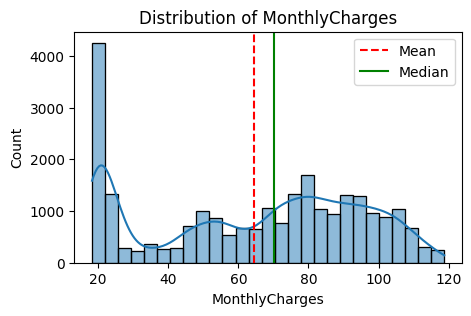

In [28]:
plot_histogram(df, "MonthlyCharges")

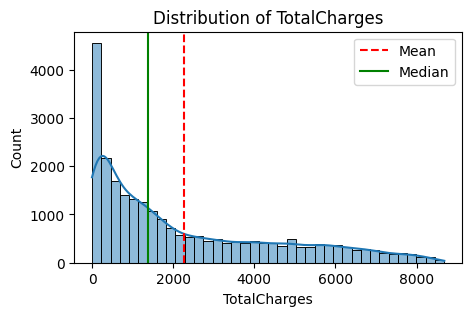

In [29]:
plot_histogram(df, "TotalCharges")

**Box plot for numerical features**

In [30]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

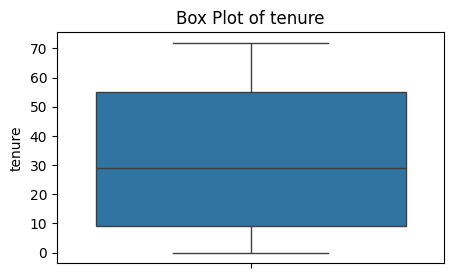

In [31]:
plot_boxplot(df, "tenure")

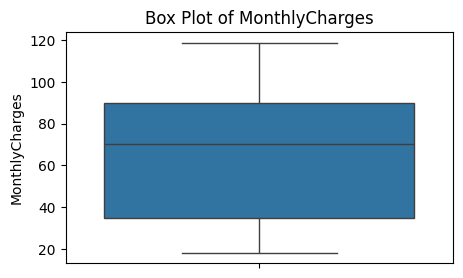

In [32]:
plot_boxplot(df, "MonthlyCharges")

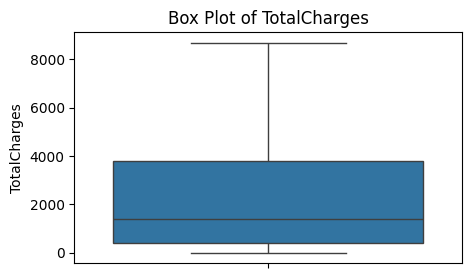

In [33]:
plot_boxplot(df, "TotalCharges")

**Correlation Heatmap for numerical columns**

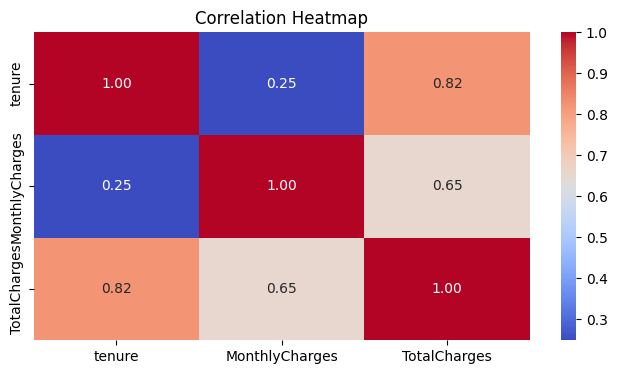

In [34]:
# correlation matrix - heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Categorical features - Analysis

In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            25000 non-null  object 
 1   SeniorCitizen     25000 non-null  int64  
 2   Partner           25000 non-null  object 
 3   Dependents        25000 non-null  object 
 4   tenure            25000 non-null  int64  
 5   PhoneService      25000 non-null  object 
 6   MultipleLines     25000 non-null  object 
 7   InternetService   25000 non-null  object 
 8   OnlineSecurity    25000 non-null  object 
 9   OnlineBackup      25000 non-null  object 
 10  DeviceProtection  25000 non-null  object 
 11  TechSupport       25000 non-null  object 
 12  StreamingTV       25000 non-null  object 
 13  StreamingMovies   25000 non-null  object 
 14  Contract          25000 non-null  object 
 15  PaperlessBilling  25000 non-null  object 
 16  PaymentMethod     25000 non-null  object

Countplot for categorical columns

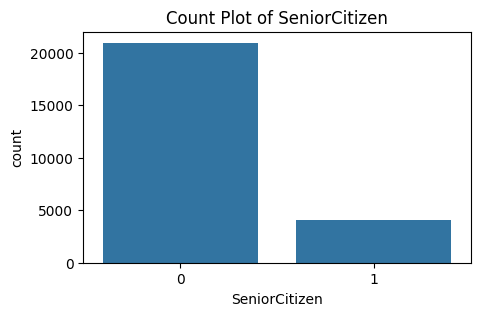

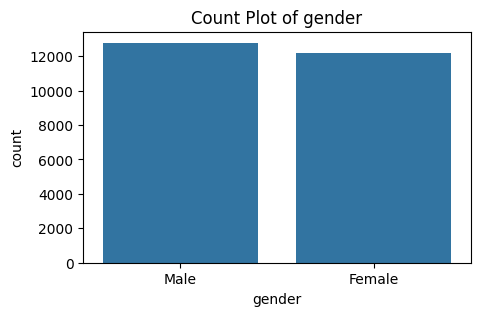

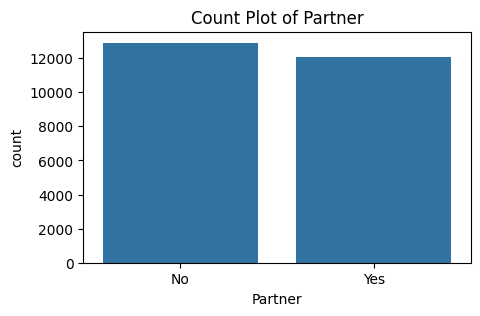

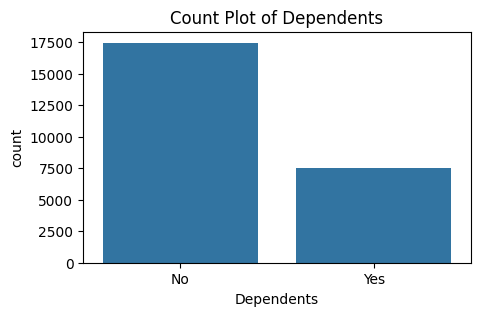

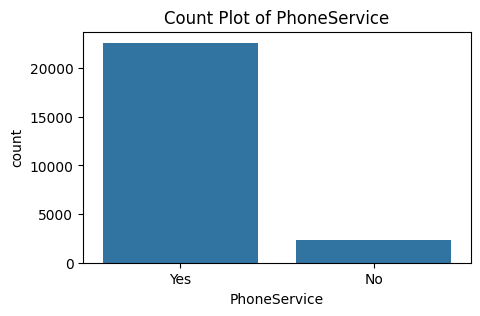

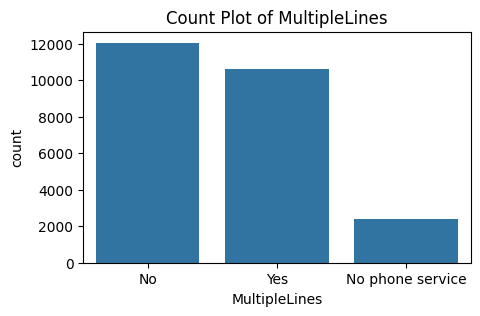

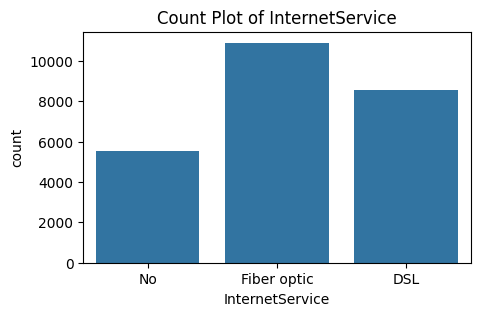

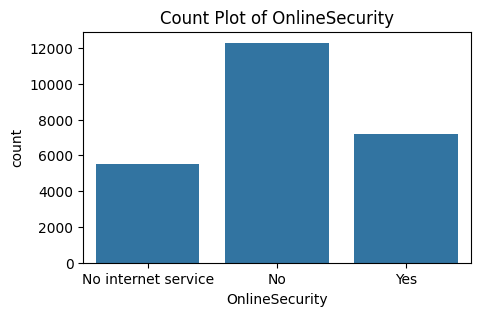

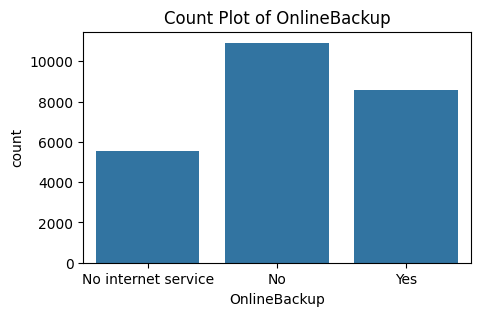

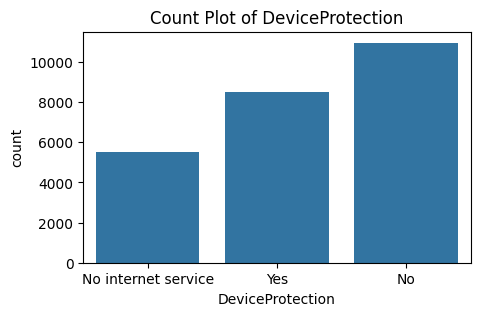

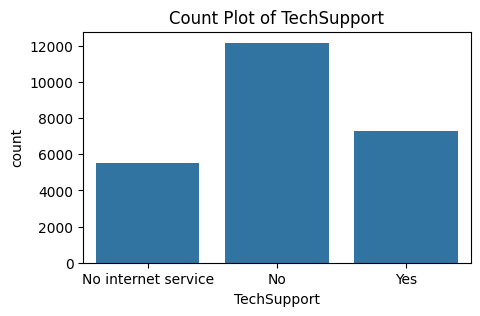

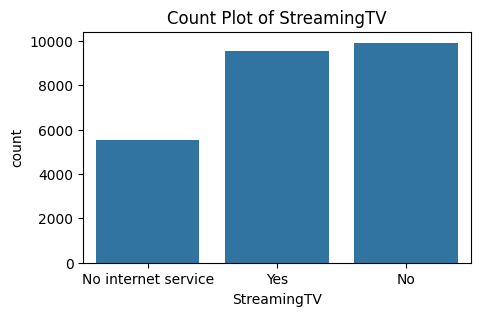

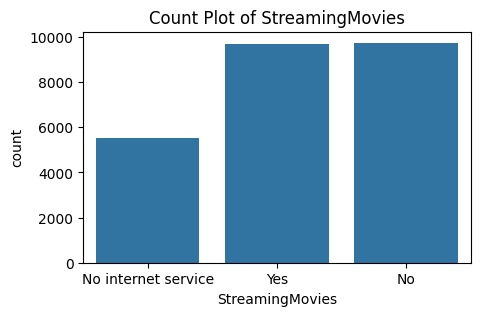

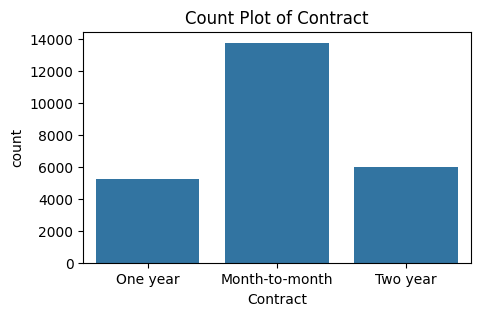

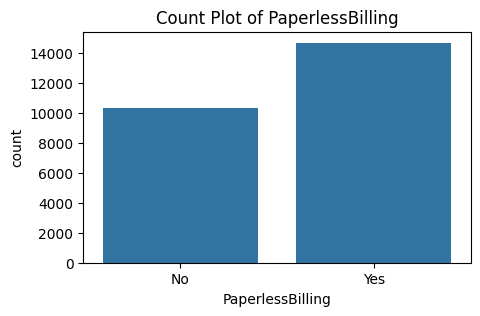

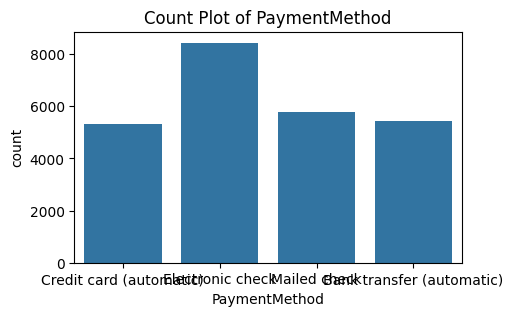

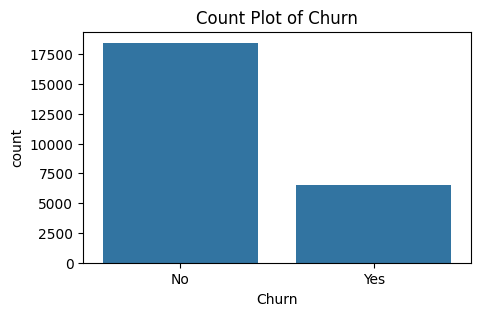

In [37]:
object_cols = df.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

**4. Data Preprocessing**

In [38]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,No
1,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
2,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No


Label encoding of target column

In [39]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

<ipython-input-39-b6eb27bc3ee0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [40]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,26,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.30,0
1,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,1
2,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,0


In [41]:
print(df["Churn"].value_counts())

Churn
0    18460
1     6540
Name: count, dtype: int64


Label encoding of categorical fetaures

In [42]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [43]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [44]:
# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [45]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [46]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,26,1,0,2,1,1,1,1,1,1,1,0,1,19.80,457.30,0
1,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1
2,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0
3,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0
4,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1


**Traianing and test data split**

In [47]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [48]:
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print(y_train.shape)

(20000,)


In [50]:
print(y_train.value_counts())

Churn
0    14739
1     5261
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)

In [51]:
X_train[X_train.isna().any(axis=1)]  # Displays rows with NaN values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [52]:
smote = SMOTE(random_state=42)

In [53]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [54]:
print(y_train_smote.shape)

(29478,)


In [55]:
print(y_train_smote.value_counts())

Churn
0    14739
1    14739
Name: count, dtype: int64


**5. Model Training**

Training with default hyperparameters

In [56]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}

In [57]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.97
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.98
----------------------------------------------------------------------


In [58]:
cv_scores

{'Decision Tree': array([0.96523066, 0.9686228 , 0.97608548, 0.96895674, 0.97625106]),
 'Random Forest': array([0.96828358, 0.97269335, 0.98643148, 0.98422392, 0.98897371])}

Random Forest gives the highest accuracy compared to other models with default parameters

In [59]:
rfc = RandomForestClassifier(random_state=42)

In [60]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [61]:
print(y_test.value_counts())

Churn
0    3721
1    1279
Name: count, dtype: int64


**6. Model Evaluation**

In [62]:
# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.9874
Confsuion Matrix:
 [[3691   30]
 [  33 1246]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3721
           1       0.98      0.97      0.98      1279

    accuracy                           0.99      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000



In [63]:
# save the trained model as a pickle file
model_data = {"model": rfc, "features_names": X.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

**7. Load the saved  model and  build a Predictive System**

In [64]:
# load teh saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [65]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [66]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [67]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# input_data = {
#     'gender': 'Male',
#     'SeniorCitizen': 0,
#     'Partner': 'Yes',
#     'Dependents': 'Yes',
#     'tenure': 53,
#     'PhoneService': 'Yes',
#     'MultipleLines': 'Yes',
#     'InternetService': 'DSL',
#     'OnlineSecurity': 'Yes',
#     'OnlineBackup': 'Yes',
#     'DeviceProtection': 'No',
#     'TechSupport': 'No',
#     'StreamingTV': 'No',
#     'StreamingMovies': 'Yes',
#     'Contract': 'Two year',
#     'PaperlessBilling': 'No',
#     'PaymentMethod': 'Bank transfer (automatic)',
#     'MonthlyCharges': 69.7,
#     'TotalCharges': 3686.05
# }







input_data_df = pd.DataFrame([input_data])



In [68]:
with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using the saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")

[1]
Prediction: Churn
Prediciton Probability: [[0.38 0.62]]


In [69]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

**To do:**
1. Implement Hyperparameter Tuining
2. Try Model Selection
3. Try downsampling
4. Try to address teh overfitting
5. Try Startified k fold CV